In [1]:
import numpy as np
import aurora.autodiff as ad
from aurora.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sbn;

sbn.set()

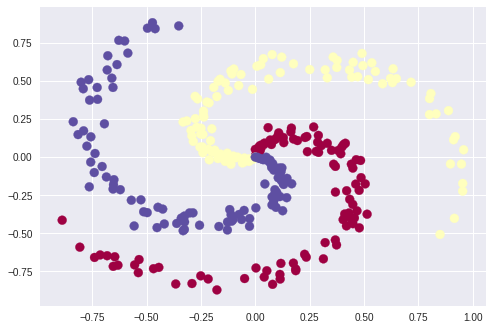

In [2]:
np.random.seed(0)
N = 100  # number of points per class
D = 2  # dimensionality
K = 3  # number of classes
H = 150
X_data = np.zeros((N * K, D))
y_data = np.zeros(N * K, dtype='uint8')
for j in range(K):
    ix = range(N * j, N * (j + 1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2  # theta
    X_data[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
    y_data[ix] = j

y_one_hot = np.zeros((N * K, K))
y_one_hot[range(N * K), y_data] = 1

plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.Spectral)
plt.show()

iter:     0 cost:  1.09860
iter:     1 cost:  1.09847
iter:     2 cost:  1.09825
iter:     3 cost:  1.09799
iter:     4 cost:  1.09770
iter:     5 cost:  1.09737
iter:     6 cost:  1.09698
iter:     7 cost:  1.09651
iter:     8 cost:  1.09594
iter:     9 cost:  1.09525
iter:    10 cost:  1.09441
iter:    20 cost:  1.06447
iter:    30 cost:  0.91488
iter:    40 cost:  0.76287
iter:    50 cost:  0.73812
iter:    60 cost:  0.72506
iter:    70 cost:  0.71366
iter:    80 cost:  0.70284
iter:    90 cost:  0.69209
iter:   100 cost:  0.68063
iter:   200 cost:  0.46290
iter:   300 cost:  0.28989
iter:   400 cost:  0.20600
iter:   500 cost:  0.14931
iter:   600 cost:  0.11368
iter:   700 cost:  0.09203
iter:   800 cost:  0.07821
iter:   900 cost:  0.06859
iter:  1000 cost:  0.06133
Prediction accuracy: 98.667%


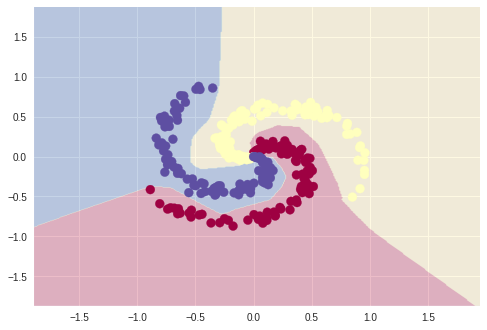

In [3]:


X = ad.Variable(name="X")
y = ad.Variable(name='y')

W1 = ad.Parameter(name="W1", init=0.01 * np.random.randn(D, H))
b1 = ad.Parameter(name="b1", init=np.zeros(H))

W2 = ad.Parameter(name="W2", init=0.01 * np.random.randn(H, K))
b2 = ad.Parameter(name="b2", init=np.zeros(K))

z1 = ad.matmul(X, W1)
hidden_1 = z1 + ad.broadcast_to(b1, z1)
activation_1 = ad.relu(hidden_1)

z2 = ad.matmul(activation_1, W2)
hidden_2 = z2 + ad.broadcast_to(b2, z2)
loss = ad.cross_entropy(hidden_2, y)

lr = 1e-3
n_epoch = 1001
optimizer = SGD(loss, params=[W1, b1, W2, b2], lr=lr, momentum=0.8)
for i in range(n_epoch):
    loss_now = optimizer.step(feed_dict={X: X_data, y: y_one_hot})
    if i <= 10 or (i <= 100 and i % 10 == 0) or (i <= 1000 and i % 100 == 0):
        fmt_str = 'iter: {0:>5d} cost: {1:>8.5f}'
        print(fmt_str.format(i, loss_now[0]))

prob = ad.softmax(hidden_2)
executor = ad.Executor([prob])
prob_values, = executor.run(feed_dict={X: X_data})

correct = np.sum(np.equal(y_data, np.argmax(prob_values, axis=1)))
print('Prediction accuracy: {0:>.3f}%'.format((correct / (N * K)) * 100.00))

h = 0.01
x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.stack((xx.ravel(), yy.ravel()), axis=1)
prob_values, = executor.run(feed_dict={X: Z})
Z = np.argmax(prob_values, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.3, antialiased=True)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=80, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()
